## Scaled Jacobian for quadrilaterals

Jacobian for iso-parametric mapping from parametric space to physical space

$
\begin{align}
J = \begin{bmatrix}
\dfrac{\partial{x}}{\partial{s}} & \dfrac{\partial{y}}{\partial{s}}\\
\dfrac{\partial{x}}{\partial{t}} & \dfrac{\partial{y}}{\partial{t}}
\end{bmatrix}	
\end{align}
$

with

$
\begin{align}
\frac{\partial{x}}{\partial{s}} &= \frac{(x_2-x_1)(1-t)+(x_3-x_4)(1+t)}{4} \\
\frac{\partial{y}}{\partial{s}} &= \frac{(y_2-y_1)(1-t)+(y_3-y_4)(1+t)}{4} \\
\frac{\partial{x}}{\partial{t}} &= \frac{(x_3-x_2)(1+s)+(x_4-x_1)(1-s)}{4} \\
\frac{\partial{y}}{\partial{t}} &= \frac{(y_3-y_2)(1+s)+(y_4-y_1)(1-s)}{4}
\end{align}
$

and its determinant

$
\begin{align}
|J| = \frac{\partial{x}}{\partial{s}}\frac{\partial{y}}{\partial{t}} - \frac{\partial{x}}{\partial{t}}\frac{\partial{y}}{\partial{s}}	
\end{align}
$

The ***scaled Jacobian*** is

$
\begin{align}
SJ = \frac{|J_{min}|}{|J_{max}|}
\end{align}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [192]:
# define quadrilateral by four points
p1 = np.array((2., 1.))
p2 = np.array((5., 2.))
p3 = np.array((5., 8.))
p4 = np.array((0., 3.))
nodes = np.stack((p1, p2, p3, p4, p1))

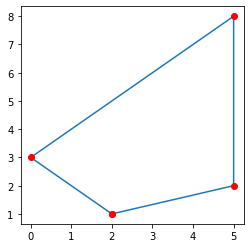

In [193]:
# plot the quadrilateral
plt.figure(figsize=(4, 4))
plt.plot(nodes[:, 0], nodes[:, 1])
plt.plot(nodes[:, 0], nodes[:, 1], 'ro')

In [194]:
# define number of points in parametric space
steps = 10
s_steps = np.linspace(-1., 1., steps)
t_steps = np.linspace(-1., 1., steps)

In [185]:
# make a grid
s, t = np.meshgrid(s_steps, t_steps, sparse=False)

In [195]:
# calculate derivatives for the Jacobian
dxds = (p2[0] - p1[0]) * (1. - t) + (p3[0] - p4[0]) * (1. + t)
dyds = (p2[1] - p1[1]) * (1. - t) + (p3[1] - p4[1]) * (1. + t)
dxdt = (p3[0] - p2[0]) * (1. + s) + (p4[0] - p1[0]) * (1. - s)
dydt = (p3[1] - p2[1]) * (1. + s) + (p4[1] - p1[1]) * (1. - s)

In [196]:
# setup the Jacobian
J = np.array(([dxds, dyds], [dxdt, dydt]))

In [201]:
# calculate the determinant of the Jacobian
detJ = np.linalg.det(J.T)

In [203]:
# calculate the "scaled Jacobian"
sj = detJ.min() / detJ.max()
print(f'Scaled Jacobian {sj:.2f}')

Scaled Jacobian 0.27


(-1.0, 1.0, -1.0, 1.0)

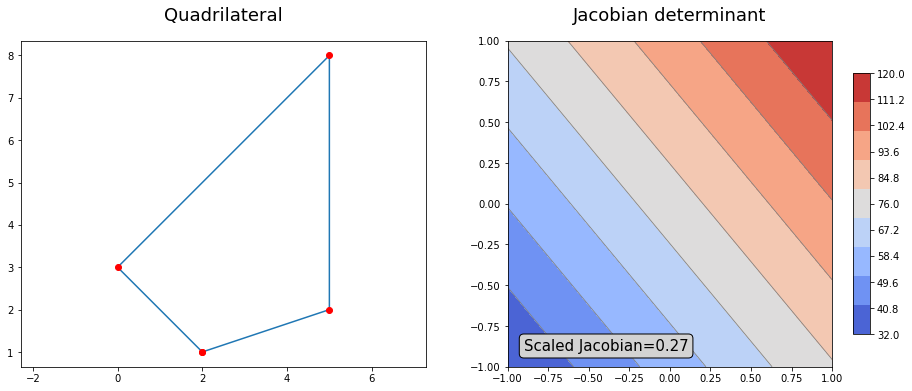

In [217]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.plot(nodes[:, 0], nodes[:, 1])
ax1.plot(nodes[:, 0], nodes[:, 1], 'ro')
ax1.set_title('Quadrilateral', size=18, pad=20)

ax2 = fig.add_subplot(122)
ax2.set_title('Jacobian determinant', size=18, pad=20)
props = dict(boxstyle='round', facecolor='lightgrey', alpha=1.0)
ax2.text(-0.9, -0.9, 'Scaled Jacobian={:0.2f}'.format(sj), color='black', size=15, bbox=props)

# define contour and colorbar levels
lvls_contour = np.linspace(detJ.min(), detJ.max(), steps, endpoint=True)
lvls_cb = np.linspace(detJ.min(), detJ.max(), 11, endpoint=True)

# plot isolines only for smaller step resolutions
if steps < 20:
    surf = ax2.contour(s, t, detJ, colors='grey', vmin=detJ.min(), vmax=detJ.max(), levels=lvls_contour, linewidths=0.8)

# plot the contour values of the Jacobian determinant
surf = ax2.contourf(s, t, detJ, cmap=cm.coolwarm, vmin=detJ.min(), vmax=detJ.max(), levels=lvls_contour)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.8, aspect=15, ticks=lvls_cb)

ax1.axis('equal')
ax2.axis('equal')